**<h1> General Information of the Data </h1>**


<h2> Data Exploration </h2>


In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.7 MB/s 


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from scipy.stats import norm 
import matplotlib as plt
import shap

In [8]:
from google.colab import files
features= files.upload()

Saving features.csv - Sheet1.csv to features.csv - Sheet1.csv


Getting the data

In [9]:
df=pd.read_csv('features.csv - Sheet1.csv')
df.head()

,Gender,Presence of Two or More Speakers,BACKGROUND NOISE (Noise/Echo/Static/Music/Studio Audience),pitch_min(min),diff( pitch),In_min(min),diff (intensity),WER-Amazon
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,75.025946,522.783250,31.748163,47.013696,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,0.0,77.353359,511.291892,48.393306,31.025016,1.0


About data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Gender                                                      200 non-null    float64
 1   Presence of Two or More Speakers                            200 non-null    float64
 2   BACKGROUND NOISE (Noise/Echo/Static/Music/Studio Audience)  200 non-null    float64
 3   pitch_min(min)                                              200 non-null    float64
 4   diff( pitch)                                                200 non-null    float64
 5   In_min(min)                                                 200 non-null    float64
 6   diff (intensity)                                            200 non-null    float64
 7   WER-Amazon                                                  200 non-null    float64
dtypes

In [11]:
df=df.rename(columns={'WER-Amazon':'Amazon_WER','Presence of Two or More Speakers':'Two_speakers','BACKGROUND NOISE (Noise/Echo/Static/Music/Studio Audience)':'Background Noise', 'diff( pitch)':'diff_pitch','diff (intensity)':'diff_intensity','pitch_min(min)':'pitch_min','In_min(min)':'intensity_min'})
df

,Gender,Two_speakers,Background Noise,pitch_min,diff_pitch,intensity_min,diff_intensity,Amazon_WER
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,75.025946,522.783250,31.748163,47.013696,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,0.0,77.353359,511.291892,48.393306,31.025016,1.0
...,...,...,...,...,...,...,...,...
396,0.0,0.0,2.0,75.326778,515.123815,33.688372,45.025301,0.0
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,1.0,0.0,1.0,75.184714,512.644594,33.530582,45.758491,0.0
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking for null values

In [12]:
len(df)

401

In [13]:
df.isnull()

,Gender,Two_speakers,Background Noise,pitch_min,diff_pitch,intensity_min,diff_intensity,Amazon_WER
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
396,False,False,False,False,False,False,False,False
397,True,True,True,True,True,True,True,True
398,False,False,False,False,False,False,False,False
399,True,True,True,True,True,True,True,True


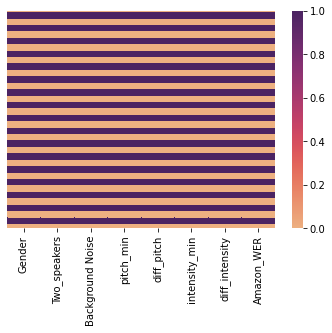

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='flare')

In [15]:
df= df.dropna()

In [16]:
df

,Gender,Two_speakers,Background Noise,pitch_min,diff_pitch,intensity_min,diff_intensity,Amazon_WER
2,0.0,0.0,0.0,75.025946,522.783250,31.748163,47.013696,1.0
4,1.0,0.0,0.0,77.353359,511.291892,48.393306,31.025016,1.0
6,0.0,0.0,5.0,85.292075,502.417502,8.396892,75.235938,0.0
8,1.0,0.0,5.0,75.408638,514.416467,42.259933,38.257027,0.0
10,1.0,0.0,10.0,75.778279,520.624403,31.107344,47.964128,0.0
...,...,...,...,...,...,...,...,...
392,2.0,0.0,4.0,89.475708,323.623732,37.666285,39.583233,1.0
394,0.0,0.0,3.0,75.406497,465.281962,34.767846,43.306744,0.0
396,0.0,0.0,2.0,75.326778,515.123815,33.688372,45.025301,0.0
398,1.0,0.0,1.0,75.184714,512.644594,33.530582,45.758491,0.0


In [17]:
len(df)

200

In [18]:
df.isnull()

,Gender,Two_speakers,Background Noise,pitch_min,diff_pitch,intensity_min,diff_intensity,Amazon_WER
2,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
392,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False


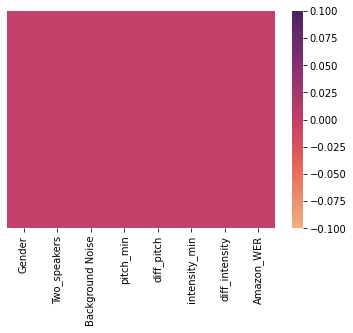

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='flare')

In [20]:
df_mean = df.copy()
corr_matrix = df_mean.corr()

In [21]:
corr_matrix

,Gender,Two_speakers,Background Noise,pitch_min,diff_pitch,intensity_min,diff_intensity,Amazon_WER
Gender,1.000000,0.010161,0.080475,0.129208,0.023242,-0.020441,0.018187,0.033591
Two_speakers,0.010161,1.000000,-0.066311,-0.064174,-0.007813,0.037601,-0.042810,-0.145044
Background Noise,0.080475,-0.066311,1.000000,0.105140,-0.053486,0.055907,-0.063527,0.036063
pitch_min,0.129208,-0.064174,0.105140,1.000000,-0.111183,-0.253100,0.247242,-0.127656
diff_pitch,0.023242,-0.007813,-0.053486,-0.111183,1.000000,-0.007419,0.005798,0.081302
intensity_min,-0.020441,0.037601,0.055907,-0.253100,-0.007419,1.000000,-0.998157,-0.112217
diff_intensity,0.018187,-0.042810,-0.063527,0.247242,0.005798,-0.998157,1.000000,0.117820
Amazon_WER,0.033591,-0.145044,0.036063,-0.127656,0.081302,-0.112217,0.117820,1.000000


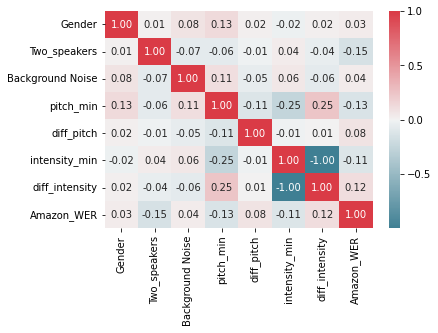

In [22]:
sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

In [23]:
df.describe()

,Gender,Two_speakers,Background Noise,pitch_min,diff_pitch,intensity_min,diff_intensity,Amazon_WER
count,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.8400,0.040000,2.535000,78.468448,450.833806,32.518667,47.176173,0.480000
std,0.7049,0.196451,4.351258,6.851102,98.667297,34.286246,34.397118,0.500854
min,0.0000,0.000000,0.000000,74.991480,75.147101,-300.000000,22.566478,0.000000
25%,0.0000,0.000000,0.000000,75.180043,444.001161,30.578071,38.509458,0.000000
50%,1.0000,0.000000,0.000000,76.079811,494.149317,36.516517,43.853999,0.000000
75%,1.0000,0.000000,4.000000,78.527369,513.805568,40.967748,48.735775,1.000000
max,2.0000,1.000000,19.000000,135.900527,524.594537,54.166232,380.827648,1.000000


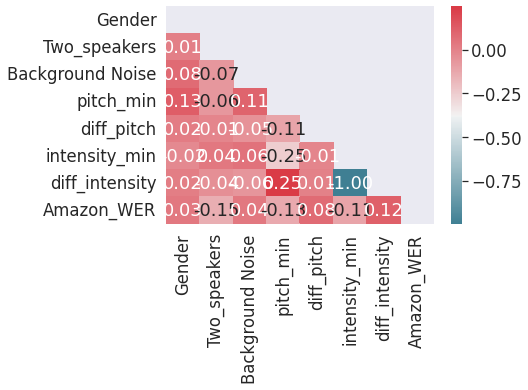

In [24]:
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f",mask=dropSelf)
sns.set(font_scale=1.5)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

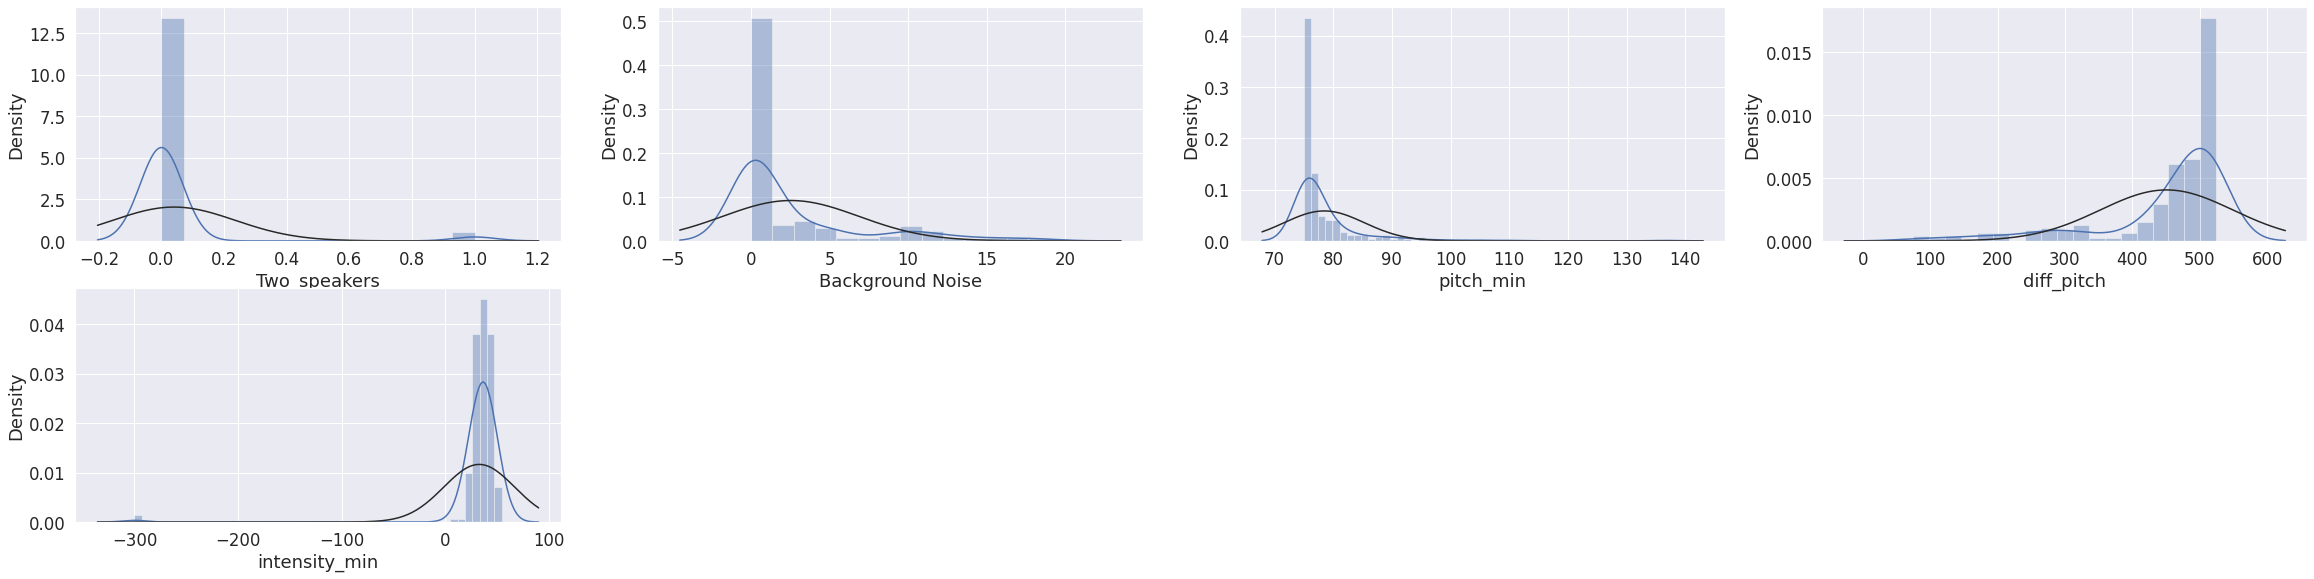

In [25]:
plt.pyplot.figure(figsize = (40,25))

for i in range(1,6):
    plt.pyplot.subplot(5,4,i)
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)

<h2> A. Logistic Regression </h2>

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.inspection import permutation_importance

In [27]:
df_lr=df_mean.copy()

In [28]:
#select the categorical vars
X_categorical = df_lr[['Gender','Two_speakers',	'Background Noise']]
#select the numerical vars
X_numerical=df_lr[['diff_pitch',	'diff_intensity','pitch_min','intensity_min']]
y=df_lr[['Amazon_WER']]

encoder = OneHotEncoder(sparse=False)
#one hot encode the categorical vars
X_onehot = encoder.fit_transform(X_categorical)
scaler = StandardScaler()
#scale the numerical vars
X_num_scaled = scaler.fit_transform(X_numerical)

# toss both back in dataframes
X_onehot=pd.DataFrame(X_onehot, columns=encoder.get_feature_names_out())
X_num_scaled=pd.DataFrame(X_num_scaled, columns=scaler.get_feature_names_out())

#join the two sets of features
X = pd.concat([X_onehot, X_num_scaled],axis=1)

In [29]:
X_onehot.head()

,Gender_0.0,Gender_1.0,Gender_2.0,Two_speakers_0.0,Two_speakers_1.0,Background Noise_0.0,Background Noise_1.0,Background Noise_2.0,Background Noise_3.0,Background Noise_4.0,...,Background Noise_10.0,Background Noise_11.0,Background Noise_12.0,Background Noise_13.0,Background Noise_14.0,Background Noise_15.0,Background Noise_16.0,Background Noise_17.0,Background Noise_18.0,Background Noise_19.0
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X.head()

,Gender_0.0,Gender_1.0,Gender_2.0,Two_speakers_0.0,Two_speakers_1.0,Background Noise_0.0,Background Noise_1.0,Background Noise_2.0,Background Noise_3.0,Background Noise_4.0,...,Background Noise_14.0,Background Noise_15.0,Background Noise_16.0,Background Noise_17.0,Background Noise_18.0,Background Noise_19.0,diff_pitch,diff_intensity,pitch_min,intensity_min
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.731043,-0.004735,-0.503735,-0.022529
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.614285,-0.470728,-0.163169,0.464165
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.524116,0.817806,0.998489,-0.705306
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.646032,-0.259950,-0.447736,0.284829
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.709108,0.022965,-0.393648,-0.041266


In [31]:
y

,Amazon_WER
2,1.0
4,1.0
6,0.0
8,0.0
10,0.0
...,...
392,1.0
394,0.0
396,0.0
398,0.0


In [32]:
#len(y_test)

In [33]:
lr = LogisticRegression(random_state=40)
lr.fit(X,y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LogisticRegression(random_state=40)

In [34]:
lr.classes_

array([0., 1.])

<h3> Feature Importance: Logistic Regression </h3>


In [35]:
lr.feature_names_in_

array(['Gender_0.0', 'Gender_1.0', 'Gender_2.0', 'Two_speakers_0.0',
       'Two_speakers_1.0', 'Background Noise_0.0', 'Background Noise_1.0',
       'Background Noise_2.0', 'Background Noise_3.0',
       'Background Noise_4.0', 'Background Noise_5.0',
       'Background Noise_6.0', 'Background Noise_7.0',
       'Background Noise_8.0', 'Background Noise_9.0',
       'Background Noise_10.0', 'Background Noise_11.0',
       'Background Noise_12.0', 'Background Noise_13.0',
       'Background Noise_14.0', 'Background Noise_15.0',
       'Background Noise_16.0', 'Background Noise_17.0',
       'Background Noise_18.0', 'Background Noise_19.0', 'diff_pitch',
       'diff_intensity', 'pitch_min', 'intensity_min'], dtype=object)

In [36]:
feature_names=lr.feature_names_in_
importance_lr = lr.coef_[0]

In [37]:
imp=zip(feature_names, importance_lr)
imp=sorted(imp, key=lambda x: -abs(x[1]))
for i,v in imp:
	print('Feature: %0s, Score: %.5f' % (i,v))

Feature: Background Noise_5.0, Score: -1.10445
Feature: Background Noise_17.0, Score: 0.77382
Feature: Two_speakers_0.0, Score: 0.66044
Feature: Two_speakers_1.0, Score: -0.66018
Feature: Background Noise_10.0, Score: 0.64512
Feature: diff_intensity, Score: 0.57310
Feature: Background Noise_4.0, Score: 0.52879
Feature: Background Noise_18.0, Score: 0.47997
Feature: pitch_min, Score: -0.44766
Feature: Background Noise_1.0, Score: -0.42973
Feature: Background Noise_19.0, Score: 0.38706
Feature: Background Noise_3.0, Score: -0.38640
Feature: Background Noise_8.0, Score: 0.38595
Feature: Background Noise_16.0, Score: -0.37303
Feature: Background Noise_11.0, Score: -0.36656
Feature: Background Noise_9.0, Score: -0.23579
Feature: Gender_0.0, Score: -0.20953
Feature: Background Noise_7.0, Score: -0.20755
Feature: Gender_1.0, Score: 0.17455
Feature: intensity_min, Score: -0.15291
Feature: diff_pitch, Score: 0.13146
Feature: Background Noise_15.0, Score: -0.12017
Feature: Background Noise_12.0,

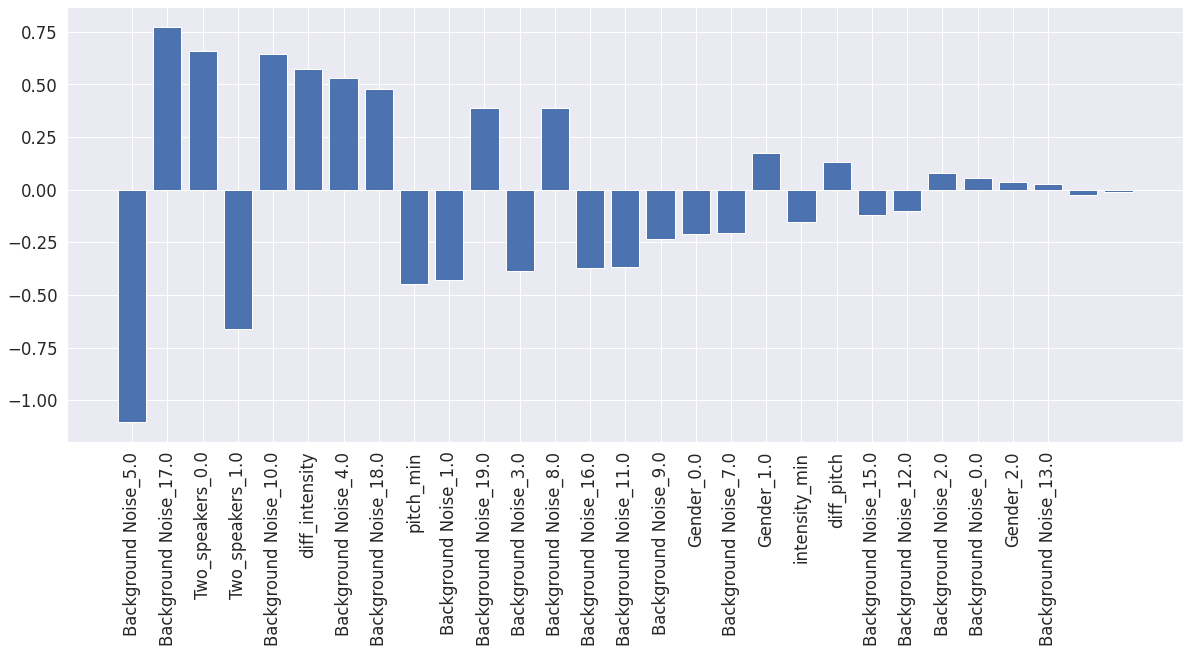

In [38]:
plt.pyplot.rcParams['figure.figsize'] = [20, 8]

imp_val = [x[1] for x in imp]
feats = [x[0] for x in imp]

fig,ax = plt.pyplot.subplots()
plt.pyplot.bar([x for x in range(len(imp))], imp_val)
ax.set_xticks(range(0,27))
ax.set_xticklabels(feats, rotation=90)
plt.pyplot.show()

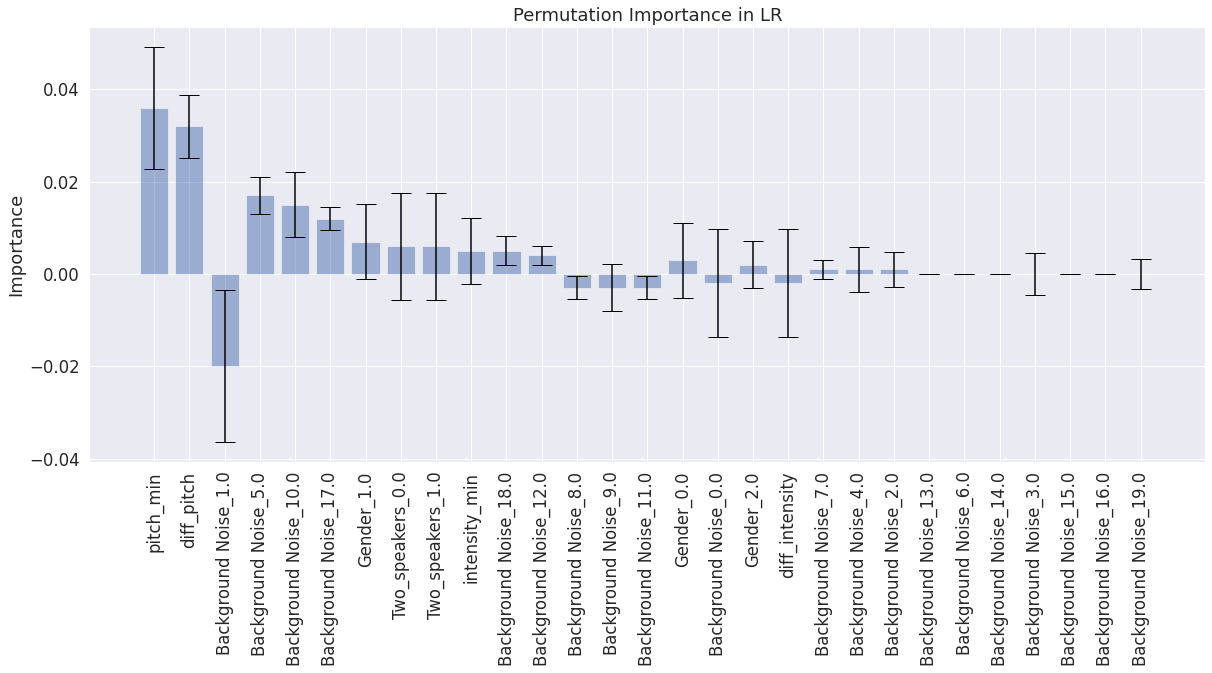

In [39]:
importance_lr = permutation_importance(lr, X, y)

sorted_idx = np.abs(importance_lr.importances_mean).argsort()[::-1]
sorted_imp = [importance_lr.importances_mean[x] for x in sorted_idx]
sorted_err = [importance_lr.importances_std[x] for x in sorted_idx]
sorted_feats = [lr.feature_names_in_[x] for x in sorted_idx]

fig, ax = plt.pyplot.subplots()
ax.bar(np.arange(len(sorted_imp)),sorted_imp, yerr=sorted_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_title('Permutation Importance in LR')
ax.set_xticks(np.arange(len(sorted_imp)))
ax.set_xticklabels(sorted_feats, rotation=90)
ax.set_ylabel('Importance')
ax.yaxis.grid(True)

In [58]:
explainer_lr = shap.Explainer(lr, masker=shap.maskers.Impute(data=X),
                           feature_names=X.columns, algorithm="linear")
shap_values_lr = explainer_lr.shap_values(X)

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [59]:
shap_values_lr

array([[-0.10652793, -0.0857725 , -0.00482044, ...,  0.01164981,
         0.13254752,  0.03309547],
       [ 0.05875375,  0.0838316 ,  0.01259085, ..., -0.1759    ,
        -0.00209286, -0.15800088],
       [-0.11755555, -0.09331827, -0.00652875, ...,  0.2793134 ,
        -0.36930134,  0.1966897 ],
       ...,
       [-0.10990848, -0.08286645, -0.00426031, ...,  0.02283113,
         0.12219198,  0.03359993],
       [ 0.05583406,  0.08655954,  0.01341976, ..., -0.05045638,
         0.16669779, -0.03701743],
       [-0.10446563, -0.08477493, -0.00459847, ..., -0.13440446,
         0.22306964, -0.06731315]])

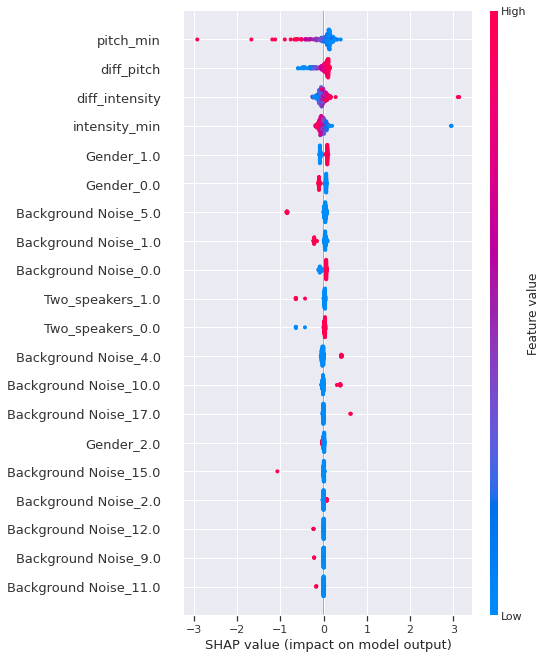

In [60]:
shap.summary_plot(shap_values_lr, X)

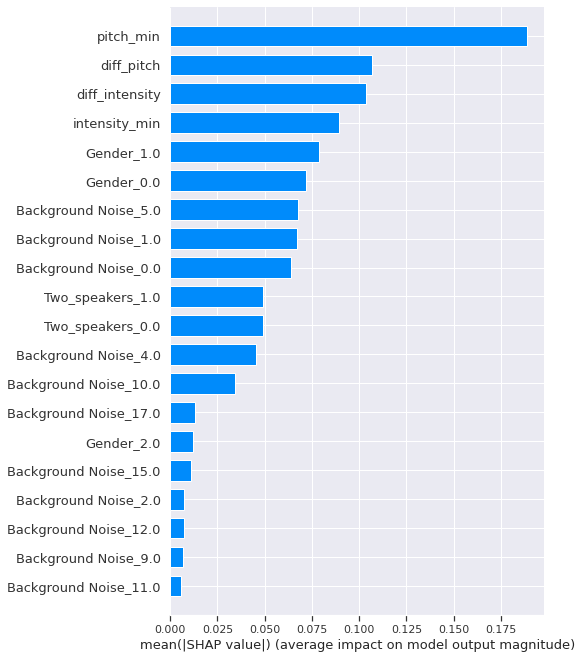

In [71]:
shap.summary_plot(shap_values_lr, X, plot_type='bar')

<h2> B. Decision Trees </h2>

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
decisiontree = DecisionTreeClassifier(criterion='gini', random_state=0)
decisiontree.fit(X, y)

DecisionTreeClassifier(random_state=0)

<h3> Feature Importance: Decision Tree </h3>

In [49]:
importance_dt = decisiontree.feature_importances_
feature_names = decisiontree.feature_names_in_
imp=zip(feature_names, importance_dt)
imp=sorted(imp, key=lambda x: -abs(x[1]))
for i,v in imp:
	print('Feature: %0s, Score: %.5f' % (i,v))

Feature: diff_pitch, Score: 0.27041
Feature: diff_intensity, Score: 0.25260
Feature: intensity_min, Score: 0.17357
Feature: pitch_min, Score: 0.09962
Feature: Background Noise_2.0, Score: 0.03151
Feature: Background Noise_10.0, Score: 0.02073
Feature: Gender_2.0, Score: 0.02055
Feature: Background Noise_5.0, Score: 0.01805
Feature: Background Noise_0.0, Score: 0.01724
Feature: Gender_0.0, Score: 0.01717
Feature: Two_speakers_1.0, Score: 0.01710
Feature: Background Noise_1.0, Score: 0.01707
Feature: Background Noise_18.0, Score: 0.01603
Feature: Background Noise_17.0, Score: 0.01499
Feature: Gender_1.0, Score: 0.01335
Feature: Two_speakers_0.0, Score: 0.00000
Feature: Background Noise_3.0, Score: 0.00000
Feature: Background Noise_4.0, Score: 0.00000
Feature: Background Noise_6.0, Score: 0.00000
Feature: Background Noise_7.0, Score: 0.00000
Feature: Background Noise_8.0, Score: 0.00000
Feature: Background Noise_9.0, Score: 0.00000
Feature: Background Noise_11.0, Score: 0.00000
Feature: B

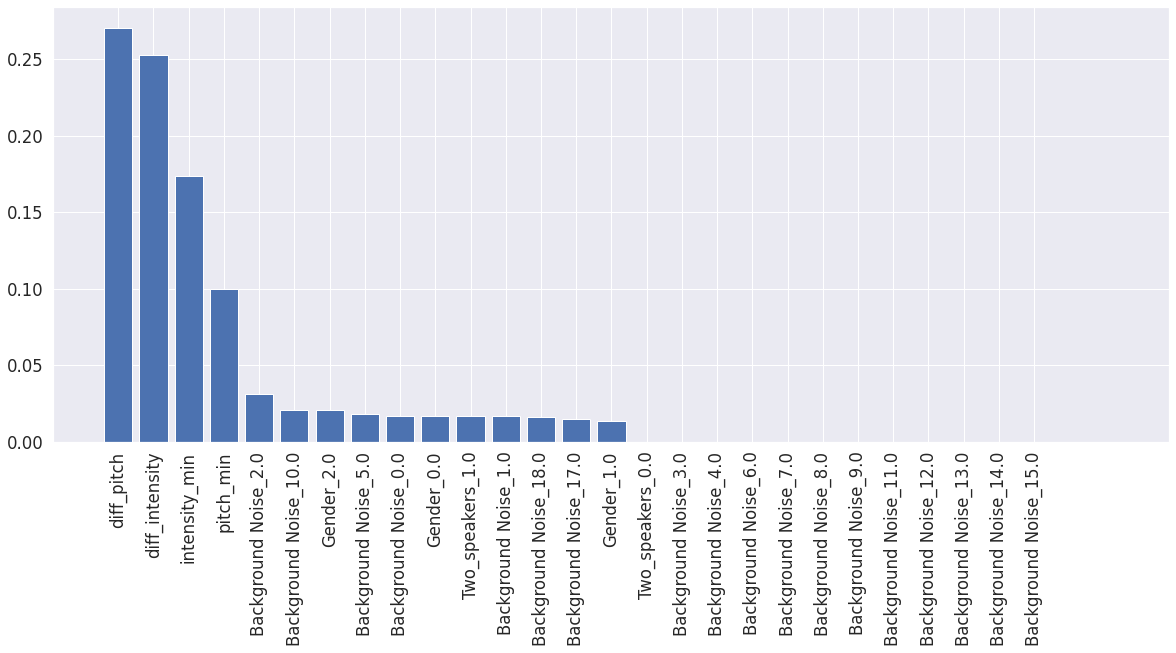

In [50]:
imp_val = [x[1] for x in imp]
feats = [x[0] for x in imp]

fig,ax = plt.pyplot.subplots()
plt.pyplot.bar([x for x in range(len(imp))], imp_val)
ax.set_xticks(range(0,27))
ax.set_xticklabels(feats, rotation=90)
plt.pyplot.show()

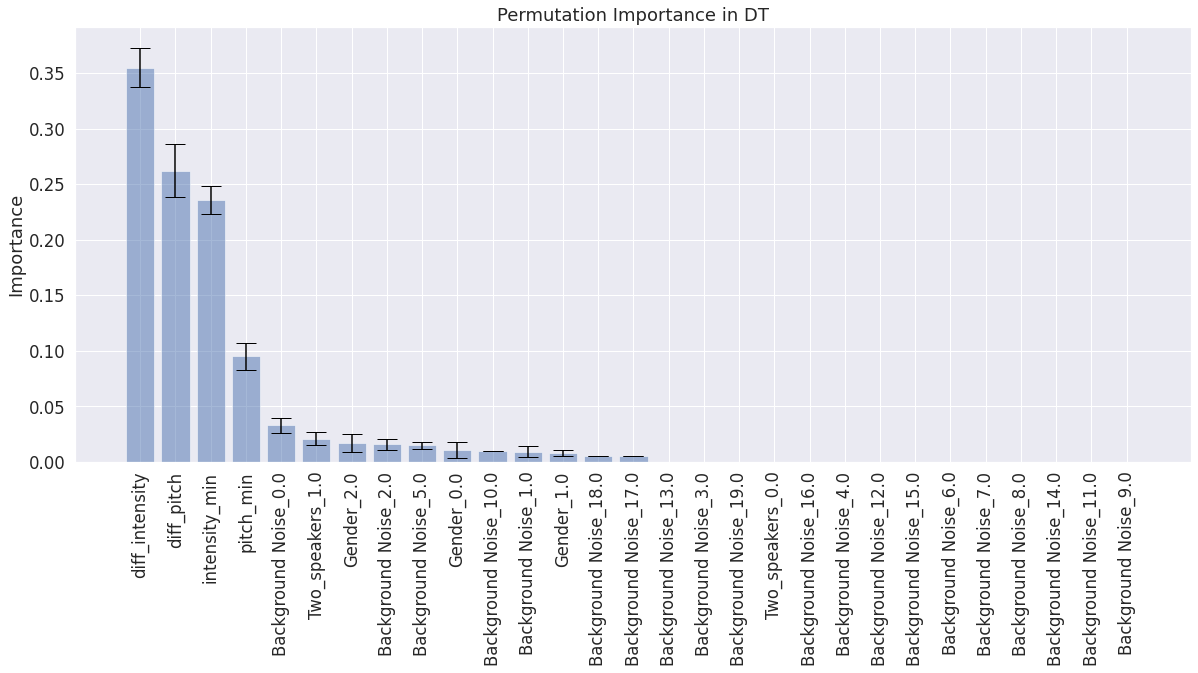

In [51]:
importance_dt = permutation_importance(decisiontree, X, y)

sorted_idx = np.abs(importance_dt.importances_mean).argsort()[::-1]
sorted_imp = [importance_dt.importances_mean[x] for x in sorted_idx]
sorted_err = [importance_dt.importances_std[x] for x in sorted_idx]
sorted_feats = [decisiontree.feature_names_in_[x] for x in sorted_idx]

fig, ax = plt.pyplot.subplots()
ax.bar(np.arange(len(sorted_imp)),sorted_imp, yerr=sorted_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_title('Permutation Importance in DT')
ax.set_xticks(np.arange(len(sorted_imp)))
ax.set_xticklabels(sorted_feats, rotation=90)
ax.set_ylabel('Importance')
ax.yaxis.grid(True)

In [61]:
explainer_dt = shap.TreeExplainer(decisiontree)
shap_values_dt = explainer_dt.shap_values(X)

In [62]:
shap_values_dt

[array([[ 0.02816453,  0.00454589, -0.00388636, ..., -0.3498474 ,
         -0.01883393, -0.05352643],
        [-0.002375  , -0.00305106, -0.00468407, ..., -0.15812522,
         -0.17283016,  0.14010395],
        [ 0.02816453,  0.00172842, -0.00820138, ..., -0.04051747,
          0.15284112,  0.11657261],
        ...,
        [ 0.02816453,  0.00989603, -0.00820138, ...,  0.22576112,
          0.05552632,  0.07066676],
        [-0.00469409, -0.00989603, -0.00820138, ...,  0.19689658,
          0.04940706,  0.06959754],
        [ 0.0075    ,  0.00620729, -0.00275   , ...,  0.1511267 ,
          0.04180197,  0.10659518]]),
 array([[-0.02816453, -0.00454589,  0.00388636, ...,  0.3498474 ,
          0.01883393,  0.05352643],
        [ 0.002375  ,  0.00305106,  0.00468407, ...,  0.15812522,
          0.17283016, -0.14010395],
        [-0.02816453, -0.00172842,  0.00820138, ...,  0.04051747,
         -0.15284112, -0.11657261],
        ...,
        [-0.02816453, -0.00989603,  0.00820138, ..., -

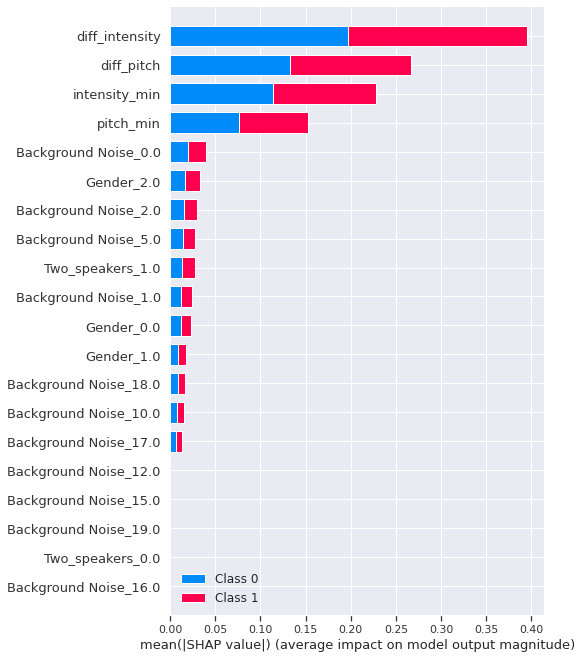

In [63]:
shap.summary_plot(shap_values_dt, X)

 <h2> C. Support Vector Machine </h2>


<h3> C.1 SVM with rbf kernel </h3>

In [64]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

In [65]:
svc=SVC() ##Default hyperparameter means C=1.0, kernel=rbf and gamma=auto

In [66]:
svc.fit(X,y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVC()

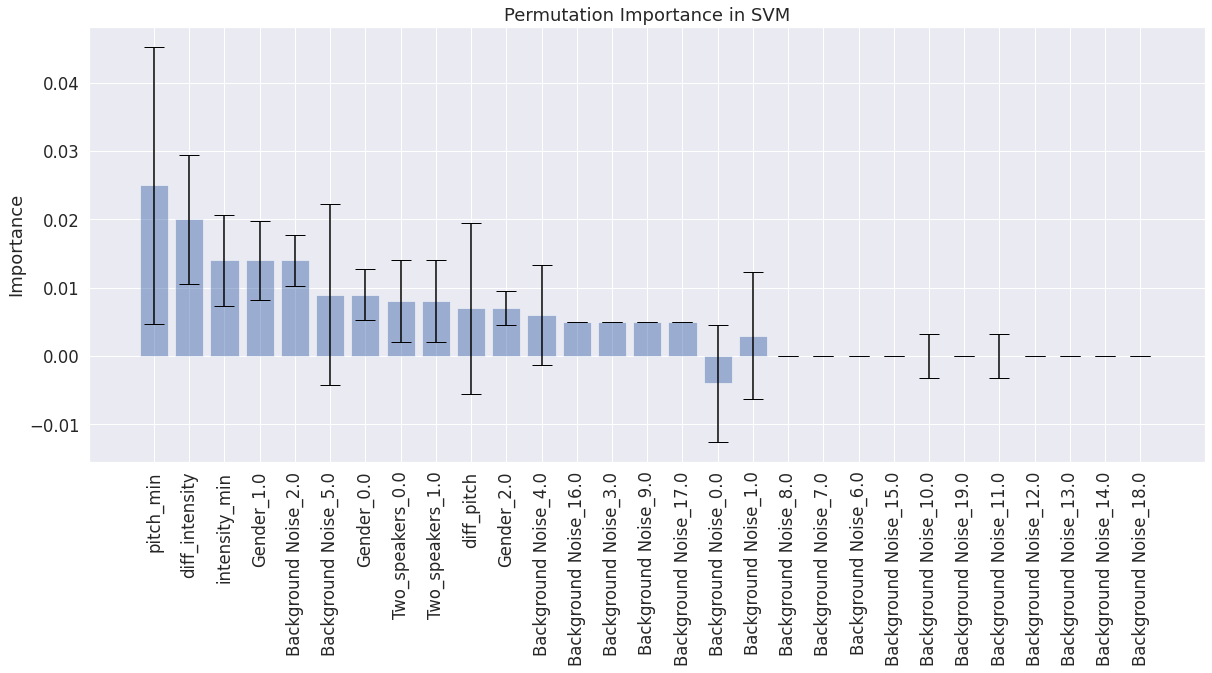

In [67]:
importance_svc = permutation_importance(svc, X, y)

sorted_idx = np.abs(importance_svc.importances_mean).argsort()[::-1]
sorted_imp = [importance_svc.importances_mean[x] for x in sorted_idx]
sorted_err = [importance_svc.importances_std[x] for x in sorted_idx]
sorted_feats = [svc.feature_names_in_[x] for x in sorted_idx]

fig, ax = plt.pyplot.subplots()
ax.bar(np.arange(len(sorted_imp)),sorted_imp, yerr=sorted_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_title('Permutation Importance in SVM')
ax.set_xticks(np.arange(len(sorted_imp)))
ax.set_xticklabels(sorted_feats, rotation=90)
ax.set_ylabel('Importance')
ax.yaxis.grid(True)

In [70]:
explainer_svm_rbf = shap.KernelExplainer(svc.predict,X)
shap_values_svm_rbf = explainer_svm_rbf.shap_values(X)

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/200 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprec

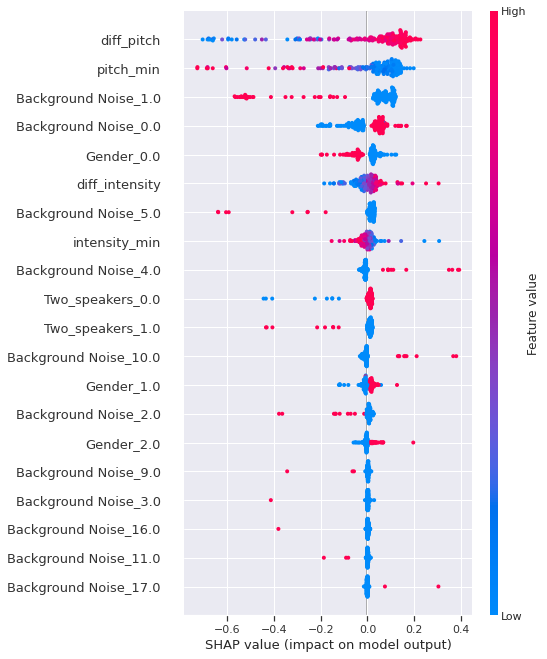

In [72]:
shap.summary_plot(shap_values_svm_rbf, X)

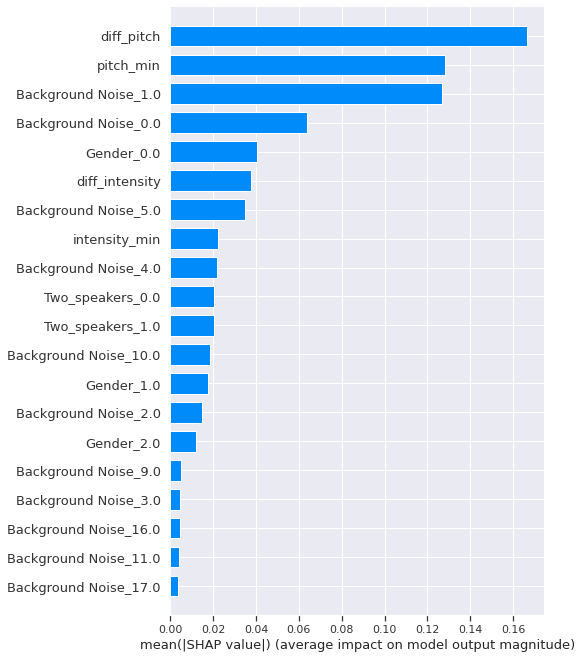

In [73]:
shap.summary_plot(shap_values_svm_rbf, X,plot_type='bar')

<h3> C.2 SVM with linear kernel </h3>

In [74]:
linear_svc=SVC(kernel='linear', C=1000.0) 
linear_svc.fit(X,y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVC(C=1000.0, kernel='linear')

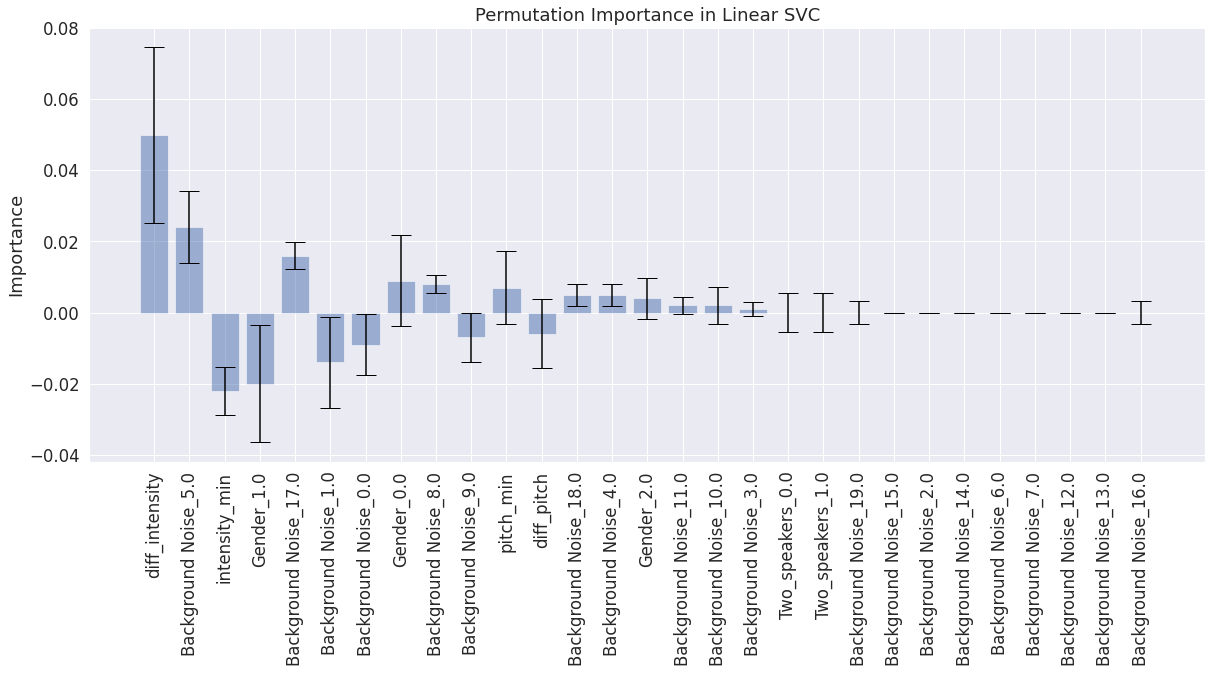

In [75]:
importance_lin_svc = permutation_importance(linear_svc, X, y)

sorted_idx = np.abs(importance_lin_svc.importances_mean).argsort()[::-1]
sorted_imp = [importance_lin_svc.importances_mean[x] for x in sorted_idx]
sorted_err = [importance_lin_svc.importances_std[x] for x in sorted_idx]
sorted_feats = [linear_svc.feature_names_in_[x] for x in sorted_idx]

fig, ax = plt.pyplot.subplots()
ax.bar(np.arange(len(sorted_imp)),sorted_imp, yerr=sorted_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_title('Permutation Importance in Linear SVC')
ax.set_xticks(np.arange(len(sorted_imp)))
ax.set_xticklabels(sorted_feats, rotation=90)
ax.set_ylabel('Importance')
ax.yaxis.grid(True)

In [76]:
explainer_svm_linear = shap.KernelExplainer(linear_svc.predict,X)
shap_values_svm_linear = explainer_svm_linear.shap_values(X)

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/200 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprec

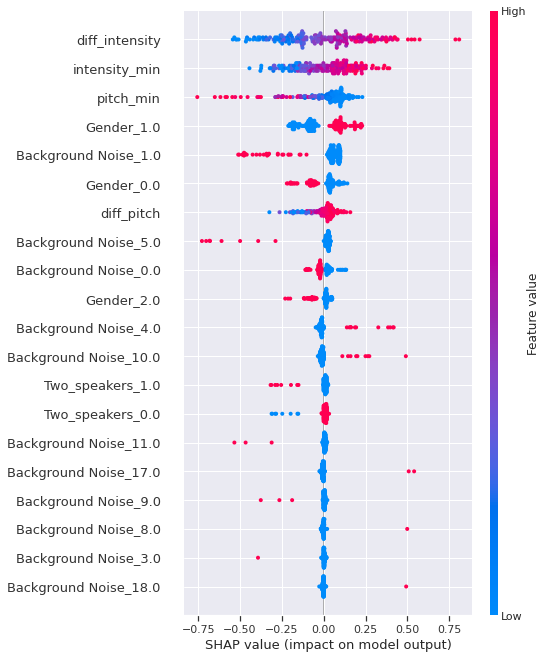

In [77]:
shap.summary_plot(shap_values_svm_linear, X)

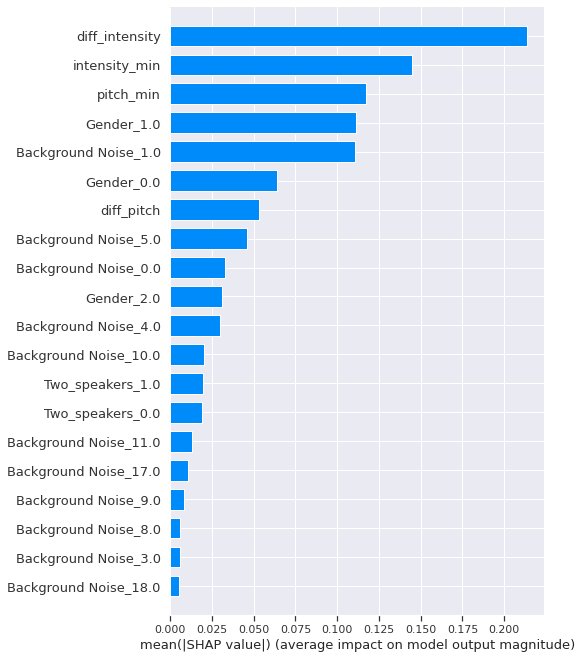

In [78]:
shap.summary_plot(shap_values_svm_linear, X, plot_type='bar')

<h2> D. XGBoost </h2>

In [79]:
from xgboost import XGBRegressor

In [80]:
xgb= XGBRegressor()

In [81]:
X

,Gender_0.0,Gender_1.0,Gender_2.0,Two_speakers_0.0,Two_speakers_1.0,Background Noise_0.0,Background Noise_1.0,Background Noise_2.0,Background Noise_3.0,Background Noise_4.0,...,Background Noise_14.0,Background Noise_15.0,Background Noise_16.0,Background Noise_17.0,Background Noise_18.0,Background Noise_19.0,diff_pitch,diff_intensity,pitch_min,intensity_min
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.731043,-0.004735,-0.503735,-0.022529
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.614285,-0.470728,-0.163169,0.464165
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.524116,0.817806,0.998489,-0.705306
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.646032,-0.259950,-0.447736,0.284829
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.709108,0.022965,-0.393648,-0.041266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.292518,-0.221297,1.610672,0.150513
196,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.146801,-0.112775,-0.448050,0.065765
197,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.653219,-0.062687,-0.459715,0.034201
198,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.628029,-0.041319,-0.480503,0.029588


In [82]:
xgb.fit(X,y)

[00:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

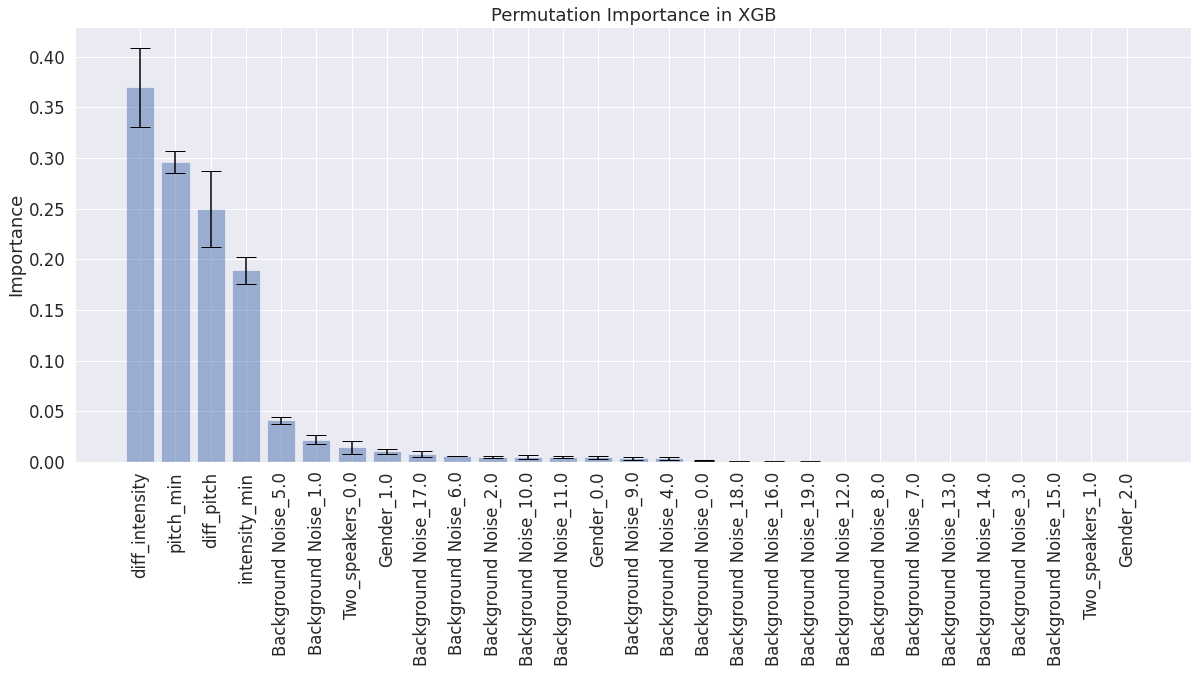

In [83]:
importance_XBG = permutation_importance(xgb, X, y)

sorted_idx = np.abs(importance_XBG.importances_mean).argsort()[::-1]
sorted_imp = [importance_XBG.importances_mean[x] for x in sorted_idx]
sorted_err = [importance_XBG.importances_std[x] for x in sorted_idx]
sorted_feats = [xgb.get_booster().feature_names[x] for x in sorted_idx]

fig, ax = plt.pyplot.subplots()
ax.bar(np.arange(len(sorted_imp)),sorted_imp, yerr=sorted_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_title('Permutation Importance in XGB')
ax.set_xticks(np.arange(len(sorted_imp)))
ax.set_xticklabels(sorted_feats, rotation=90)
ax.set_ylabel('Importance')
ax.yaxis.grid(True)

In [87]:
explainer_xgb = shap.Explainer(xgb, feature_names=feature_names, algorithm='tree')
shap_values_xgb = explainer_xgb.shap_values(X)

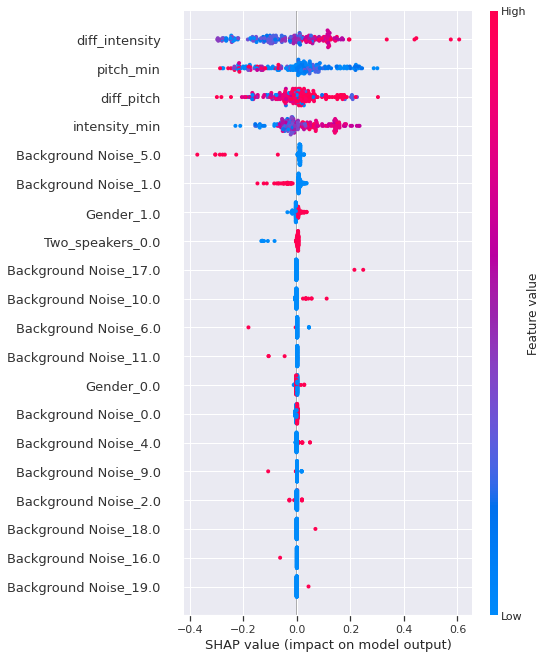

In [88]:
shap.summary_plot(shap_values_xgb, X)

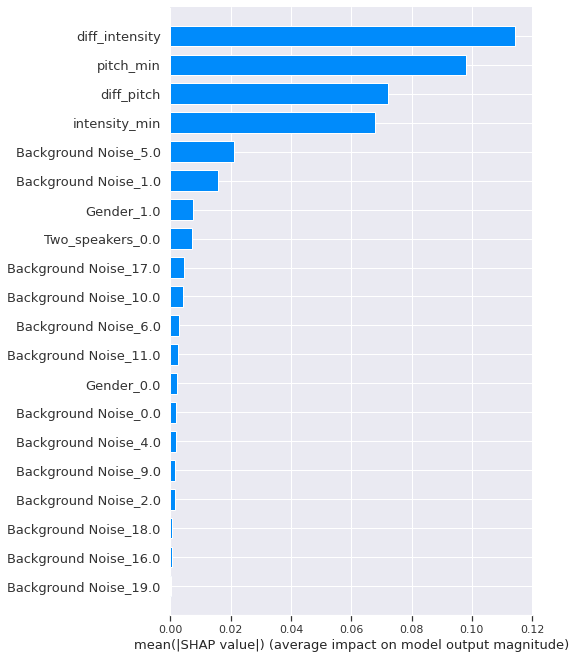

In [89]:
shap.summary_plot(shap_values_xgb, X, plot_type='bar')

<h3> ADA Boost </h3>

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
adb = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
adb.fit(X, y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


AdaBoostClassifier(learning_rate=1)

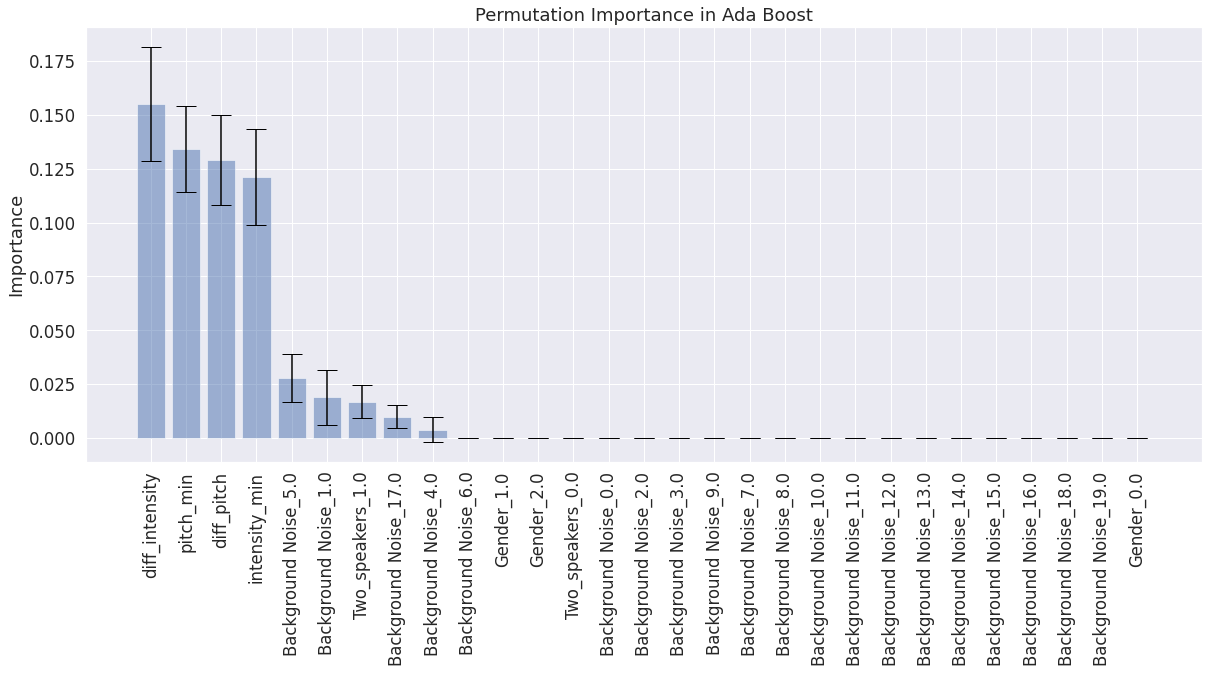

In [92]:
importance_adb = permutation_importance(adb, X, y)

sorted_idx = np.abs(importance_adb.importances_mean).argsort()[::-1]
sorted_imp = [importance_adb.importances_mean[x] for x in sorted_idx]
sorted_err = [importance_adb.importances_std[x] for x in sorted_idx]
sorted_feats = [adb.feature_names_in_[x] for x in sorted_idx]

fig, ax = plt.pyplot.subplots()
ax.bar(np.arange(len(sorted_imp)),sorted_imp, yerr=sorted_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_title('Permutation Importance in Ada Boost')
ax.set_xticks(np.arange(len(sorted_imp)))
ax.set_xticklabels(sorted_feats, rotation=90)
ax.set_ylabel('Importance')
ax.yaxis.grid(True)

In [93]:
explainer_adb = shap.KernelExplainer(adb.predict, X)
shap_values_adb = explainer_adb.shap_values(X)

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


  0%|          | 0/200 [00:00<?, ?it/s]

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
The default o

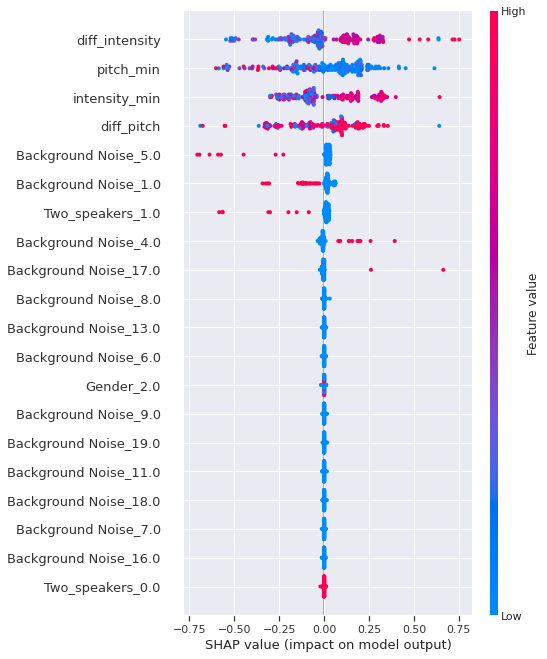

In [94]:
shap.summary_plot(shap_values_adb, X)

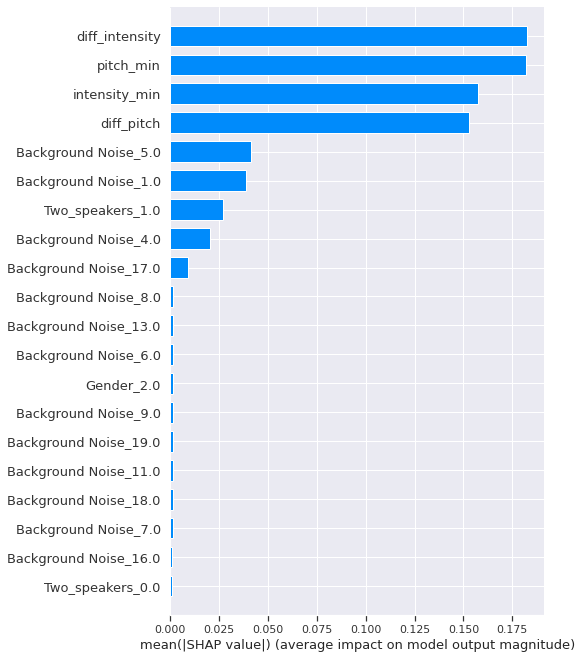

In [95]:
shap.summary_plot(shap_values_adb, X, plot_type='bar')

References: <br>
Feature Importance: https://machinelearningmastery.com/calculate-feature-importance-with-python/ <br>
Logistic Regression: https://www.kaggle.com/code/ecedolen/classification-logistic-regression-wine-quality/notebook <br>
Decision Trees: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial <br>
SVM: https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook <br>
Permutation Importance: https://www.kaggle.com/code/dansbecker/permutation-importance <br>
